# 线性代数基础 - 机器学习必备

## 学习目标
- 理解向量和矩阵的基本概念
- 掌握向量和矩阵运算
- 理解点积、矩阵乘法的几何意义
- 学习特征值和特征向量
- 了解如何应用到机器学习中

---

## 为什么机器学习需要线性代数？

### 实际应用场景
1. **数据表示**：每个样本是一个向量，数据集是矩阵
2. **模型参数**：神经网络的权重是矩阵
3. **前向传播**：矩阵乘法计算预测值
4. **降维**：PCA使用特征值分解
5. **推荐系统**：矩阵分解

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 配置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(42)
print('✓ 库导入成功')

✓ 库导入成功


## 1. 向量 (Vectors)

### 什么是向量？
向量是有方向和大小的量，在机器学习中：
- **一个样本** = 一个向量
- **特征** = 向量的每个分量

例如：一个人的数据 `[身高, 体重, 年龄]` = `[175, 70, 25]`

In [2]:
# 创建向量
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

print(f'向量v1: {v1}')
print(f'向量v2: {v2}')
print(f'v1的形状: {v1.shape}')
print(f'v1的维度: {v1.ndim}')

向量v1: [1 2 3]
向量v2: [4 5 6]
v1的形状: (3,)
v1的维度: 1


### 向量的可视化

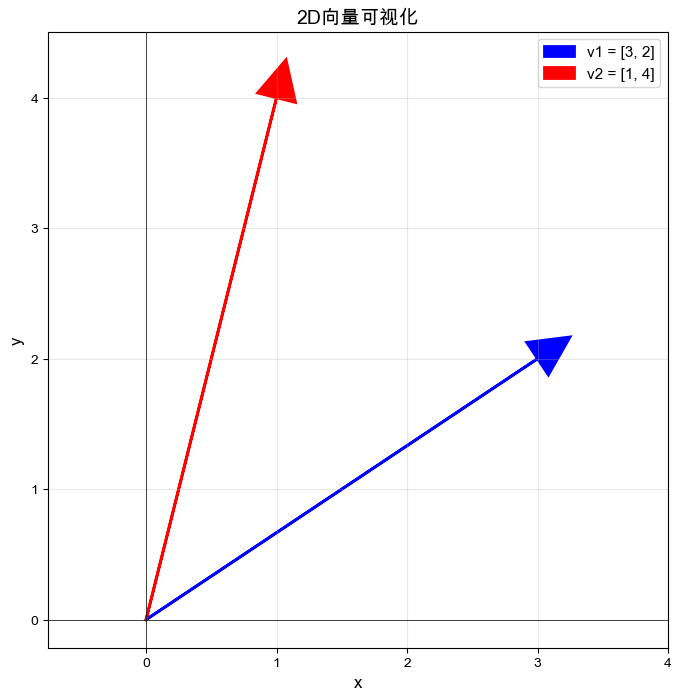

In [3]:
# 2D向量可视化
def plot_vectors_2d(vectors, labels, colors):
    """
    绘制2D向量
    """
    plt.figure(figsize=(8, 8))
    
    for vec, label, color in zip(vectors, labels, colors):
        plt.arrow(0, 0, vec[0], vec[1], 
                 head_width=0.3, head_length=0.3, 
                 fc=color, ec=color, linewidth=2,
                 label=label)
    
    # 设置坐标轴
    max_val = max([max(abs(v)) for v in vectors]) + 1
    plt.xlim(-max_val, max_val)
    plt.ylim(-max_val, max_val)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('2D向量可视化', fontsize=14)
    plt.axis('equal')
    plt.show()

# 示例
v1 = np.array([3, 2])
v2 = np.array([1, 4])

plot_vectors_2d(
    [v1, v2],
    ['v1 = [3, 2]', 'v2 = [1, 4]'],
    ['blue', 'red']
)

### 向量运算

#### 1. 向量加法
$$\vec{v_1} + \vec{v_2} = [v_{1x} + v_{2x}, v_{1y} + v_{2y}]$$

v1 + v2 = [4 6]


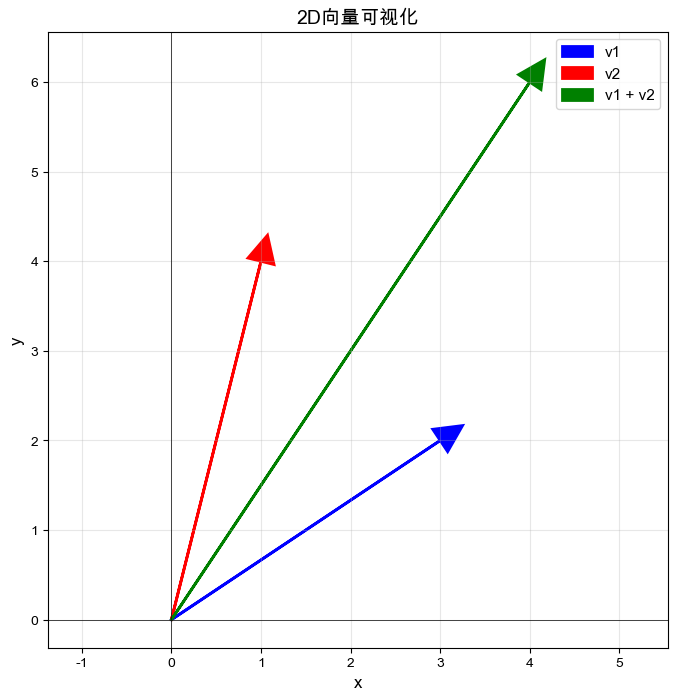

In [4]:
v1 = np.array([3, 2])
v2 = np.array([1, 4])
v_sum = v1 + v2

print(f'v1 + v2 = {v_sum}')

# 可视化
plot_vectors_2d(
    [v1, v2, v_sum],
    ['v1', 'v2', 'v1 + v2'],
    ['blue', 'red', 'green']
)

#### 2. 标量乘法
$$c \cdot \vec{v} = [c \cdot v_x, c \cdot v_y]$$

改变向量的长度，不改变方向（c > 0时）

v = [2 1]
2 * v = [4 2]


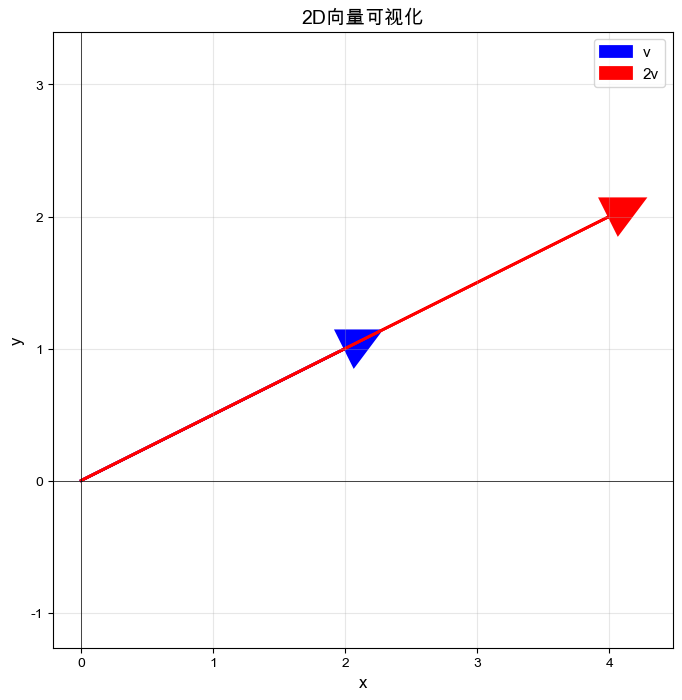

In [5]:
v = np.array([2, 1])
v_scaled = 2 * v

print(f'v = {v}')
print(f'2 * v = {v_scaled}')

plot_vectors_2d(
    [v, v_scaled],
    ['v', '2v'],
    ['blue', 'red']
)

#### 3. 点积（内积）
$$\vec{v_1} \cdot \vec{v_2} = v_{1x} \cdot v_{2x} + v_{1y} \cdot v_{2y}$$

**几何意义**：
$$\vec{v_1} \cdot \vec{v_2} = |\vec{v_1}| \cdot |\vec{v_2}| \cdot \cos(\theta)$$

- 点积 > 0：夹角 < 90°（方向大致相同）
- 点积 = 0：夹角 = 90°（垂直）
- 点积 < 0：夹角 > 90°（方向大致相反）

In [6]:
v1 = np.array([3, 2])
v2 = np.array([1, 4])

# 点积计算
dot_product = np.dot(v1, v2)
# 或者
dot_product_alt = v1 @ v2

print(f'v1 · v2 = {dot_product}')
print(f'验证: 3*1 + 2*4 = {3*1 + 2*4}')

# 计算夹角
norm_v1 = np.linalg.norm(v1)  # 向量的长度（模）
norm_v2 = np.linalg.norm(v2)
cos_theta = dot_product / (norm_v1 * norm_v2)
theta_rad = np.arccos(cos_theta)
theta_deg = np.degrees(theta_rad)

print(f'\n|v1| = {norm_v1:.2f}')
print(f'|v2| = {norm_v2:.2f}')
print(f'夹角 = {theta_deg:.2f}°')

v1 · v2 = 11
验证: 3*1 + 2*4 = 11

|v1| = 3.61
|v2| = 4.12
夹角 = 42.27°


### 📌 ML应用：余弦相似度

在推荐系统和NLP中，用来衡量两个向量的相似度：

$$\text{similarity}(\vec{v_1}, \vec{v_2}) = \frac{\vec{v_1} \cdot \vec{v_2}}{|\vec{v_1}| \cdot |\vec{v_2}|}$$

In [7]:
def cosine_similarity(v1, v2):
    """计算余弦相似度"""
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# 示例：用户对电影的评分
user1 = np.array([5, 4, 0, 1])  # [动作片, 喜剧片, 恐怖片, 爱情片]
user2 = np.array([4, 5, 1, 0])
user3 = np.array([0, 1, 5, 4])

sim_1_2 = cosine_similarity(user1, user2)
sim_1_3 = cosine_similarity(user1, user3)

print('用户1 vs 用户2 相似度:', f'{sim_1_2:.3f}')
print('用户1 vs 用户3 相似度:', f'{sim_1_3:.3f}')
print('\n用户1和用户2口味相似！（都喜欢动作片和喜剧片）')

用户1 vs 用户2 相似度: 0.952
用户1 vs 用户3 相似度: 0.190

用户1和用户2口味相似！（都喜欢动作片和喜剧片）


## 2. 矩阵 (Matrices)

### 什么是矩阵？
矩阵是数字的二维数组，在机器学习中：
- **数据集** = 矩阵（每行是一个样本）
- **权重** = 矩阵（神经网络）
- **图像** = 矩阵（像素值）

In [8]:
# 创建矩阵
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print('矩阵A:')
print(A)
print(f'\n形状: {A.shape}  # (行数, 列数)')
print(f'维度: {A.ndim}')

矩阵A:
[[1 2 3]
 [4 5 6]]

形状: (2, 3)  # (行数, 列数)
维度: 2


### 机器学习数据集示例

In [9]:
# 示例：房价数据集
# 每行一个房子，列是特征
houses = np.array([
    [120, 3, 2010],  # [面积(m²), 卧室数, 建造年份]
    [80,  2, 2015],
    [150, 4, 2005],
    [95,  2, 2018]
])

print('房价数据集矩阵:')
print(houses)
print(f'\n形状: {houses.shape}  # 4个房子, 3个特征')
print(f'\n第1个房子: {houses[0]}')
print(f'所有房子的面积: {houses[:, 0]}')

房价数据集矩阵:
[[ 120    3 2010]
 [  80    2 2015]
 [ 150    4 2005]
 [  95    2 2018]]

形状: (4, 3)  # 4个房子, 3个特征

第1个房子: [ 120    3 2010]
所有房子的面积: [120  80 150  95]


### 矩阵运算

#### 1. 矩阵加法（对应元素相加）

In [10]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = A + B

print('A + B =')
print(C)

A + B =
[[ 6  8]
 [10 12]]


#### 2. 矩阵乘法（重要！）

$$C_{ij} = \sum_{k} A_{ik} \cdot B_{kj}$$

**规则**：
- A的列数 必须等于 B的行数
- 结果矩阵形状：(A的行数, B的列数)

In [11]:
# 矩阵乘法示例
A = np.array([
    [1, 2],
    [3, 4]
])  # 2x2

B = np.array([
    [5, 6],
    [7, 8]
])  # 2x2

# 矩阵乘法
C = A @ B  # 或 np.dot(A, B) 或 np.matmul(A, B)

print('A @ B =')
print(C)
print(f'\n验证C[0,0] = 1*5 + 2*7 = {1*5 + 2*7}')
print(f'验证C[0,1] = 1*6 + 2*8 = {1*6 + 2*8}')

A @ B =
[[19 22]
 [43 50]]

验证C[0,0] = 1*5 + 2*7 = 19
验证C[0,1] = 1*6 + 2*8 = 22


### 📌 ML应用：矩阵乘法 = 线性变换

神经网络的前向传播本质就是矩阵乘法！

In [12]:
# 示例：简单的线性层
# X: 数据 (3个样本, 2个特征)
# W: 权重 (2个特征, 4个神经元)
# Y: 输出 (3个样本, 4个神经元)

X = np.array([
    [1.0, 2.0],  # 样本1
    [3.0, 4.0],  # 样本2
    [5.0, 6.0]   # 样本3
])  # 形状: (3, 2)

W = np.array([
    [0.1, 0.2, 0.3, 0.4],  # 特征1的权重
    [0.5, 0.6, 0.7, 0.8]   # 特征2的权重
])  # 形状: (2, 4)

# 前向传播：Y = X @ W
Y = X @ W  # 形状: (3, 4)

print('输入X (3个样本, 2个特征):')
print(X)
print('\n权重W (2个特征, 4个神经元):')
print(W)
print('\n输出Y (3个样本, 4个神经元):')
print(Y)
print(f'\n形状变换: {X.shape} @ {W.shape} = {Y.shape}')

输入X (3个样本, 2个特征):
[[1. 2.]
 [3. 4.]
 [5. 6.]]

权重W (2个特征, 4个神经元):
[[0.1 0.2 0.3 0.4]
 [0.5 0.6 0.7 0.8]]

输出Y (3个样本, 4个神经元):
[[1.1 1.4 1.7 2. ]
 [2.3 3.  3.7 4.4]
 [3.5 4.6 5.7 6.8]]

形状变换: (3, 2) @ (2, 4) = (3, 4)


#### 3. 转置 (Transpose)

交换矩阵的行和列：
$$(A^T)_{ij} = A_{ji}$$

In [13]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])  # 2x3

A_T = A.T  # 或 np.transpose(A)

print('原矩阵A (2x3):')
print(A)
print('\n转置A^T (3x2):')
print(A_T)

原矩阵A (2x3):
[[1 2 3]
 [4 5 6]]

转置A^T (3x2):
[[1 4]
 [2 5]
 [3 6]]


#### 4. 单位矩阵 (Identity Matrix)

对角线为1，其他为0：
$$I = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

性质：$A \cdot I = I \cdot A = A$

In [14]:
# 创建单位矩阵
I = np.eye(3)

print('3x3单位矩阵:')
print(I)

# 验证性质
A = np.array([[1, 2], [3, 4]])
I2 = np.eye(2)

print('\nA @ I = A:')
print(A @ I2)

3x3单位矩阵:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

A @ I = A:
[[1. 2.]
 [3. 4.]]


#### 5. 矩阵的逆 (Inverse)

如果存在矩阵$A^{-1}$使得：
$$A \cdot A^{-1} = A^{-1} \cdot A = I$$

则$A^{-1}$是$A$的逆矩阵。

**应用**：求解线性方程组 $Ax = b \Rightarrow x = A^{-1}b$

In [15]:
A = np.array([
    [4, 7],
    [2, 6]
])

# 计算逆矩阵
A_inv = np.linalg.inv(A)

print('矩阵A:')
print(A)
print('\n逆矩阵A^(-1):')
print(A_inv)
print('\n验证 A @ A^(-1) = I:')
print(A @ A_inv)

矩阵A:
[[4 7]
 [2 6]]

逆矩阵A^(-1):
[[ 0.6 -0.7]
 [-0.2  0.4]]

验证 A @ A^(-1) = I:
[[ 1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16  1.00000000e+00]]


### 📌 ML应用：正规方程求解线性回归

线性回归的闭式解：
$$w = (X^T X)^{-1} X^T y$$

In [16]:
# 生成简单数据
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 添加偏置项（x0 = 1）
X_b = np.c_[np.ones((100, 1)), X]

# 正规方程求解
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print('正规方程求解的参数:')
print(f'b (截距) = {theta_best[0, 0]:.4f}  (真实值: 4.0)')
print(f'w (斜率) = {theta_best[1, 0]:.4f}  (真实值: 3.0)')

正规方程求解的参数:
b (截距) = 4.2151  (真实值: 4.0)
w (斜率) = 2.7701  (真实值: 3.0)


## 3. 特征值和特征向量

### 定义
对于方阵$A$，如果存在标量$\lambda$和非零向量$v$使得：
$$A v = \lambda v$$

则：
- $\lambda$是**特征值**（eigenvalue）
- $v$是**特征向量**（eigenvector）

### 几何意义
矩阵$A$作用在特征向量$v$上，只改变$v$的长度（缩放$\lambda$倍），不改变方向！

In [17]:
# 计算特征值和特征向量
A = np.array([
    [3, 1],
    [1, 3]
])

eigenvalues, eigenvectors = np.linalg.eig(A)

print('矩阵A:')
print(A)
print(f'\n特征值: {eigenvalues}')
print(f'\n特征向量:')
print(eigenvectors)

# 验证 A @ v = λ @ v
v1 = eigenvectors[:, 0]
lambda1 = eigenvalues[0]

print(f'\n验证第一个特征向量:')
print(f'A @ v1 = {A @ v1}')
print(f'λ1 * v1 = {lambda1 * v1}')
print('✓ 相等！')

矩阵A:
[[3 1]
 [1 3]]

特征值: [4. 2.]

特征向量:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

验证第一个特征向量:
A @ v1 = [2.82842712 2.82842712]
λ1 * v1 = [2.82842712 2.82842712]
✓ 相等！


### 可视化特征向量

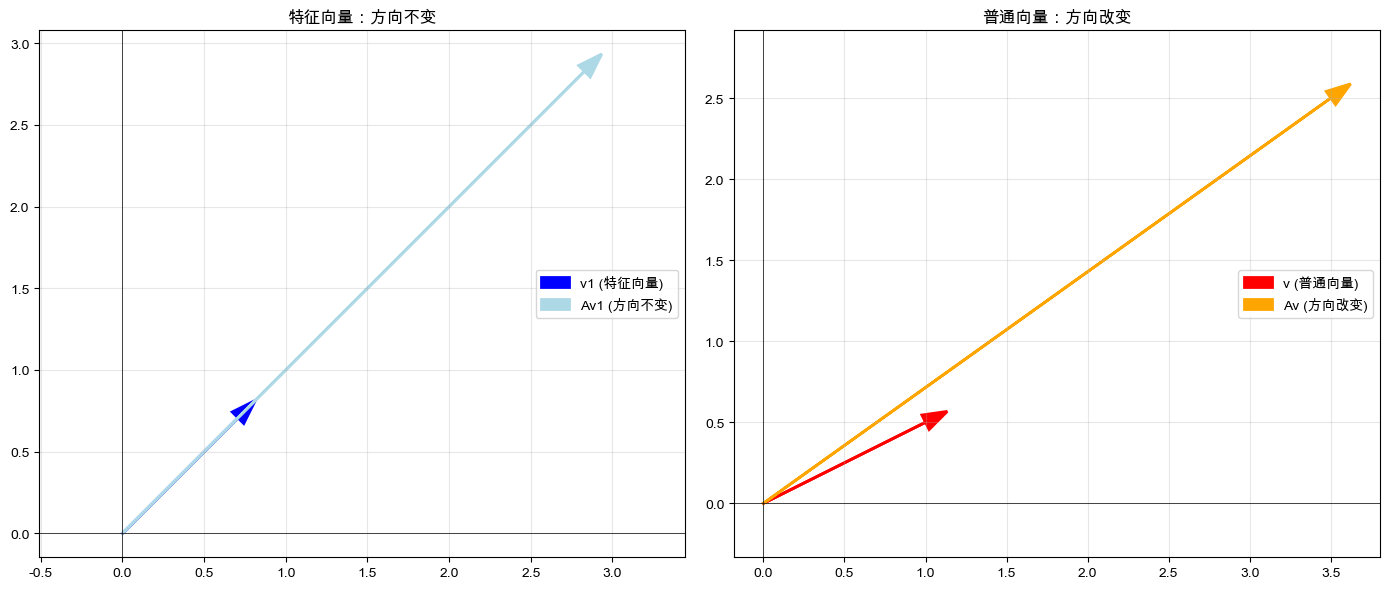

In [18]:
# 可视化矩阵变换和特征向量
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 原始向量
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
test_v = np.array([1, 0.5])

# 变换后的向量
Av1 = A @ v1
Av2 = A @ v2
Atest = A @ test_v

# 左图：特征向量
axes[0].arrow(0, 0, v1[0], v1[1], head_width=0.1, fc='blue', ec='blue', linewidth=2, label='v1 (特征向量)')
axes[0].arrow(0, 0, Av1[0], Av1[1], head_width=0.1, fc='lightblue', ec='lightblue', linewidth=2, label='Av1 (方向不变)')
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)
axes[0].legend(fontsize=10)
axes[0].set_title('特征向量：方向不变', fontsize=12)
axes[0].axis('equal')

# 右图：普通向量
axes[1].arrow(0, 0, test_v[0], test_v[1], head_width=0.1, fc='red', ec='red', linewidth=2, label='v (普通向量)')
axes[1].arrow(0, 0, Atest[0], Atest[1], head_width=0.1, fc='orange', ec='orange', linewidth=2, label='Av (方向改变)')
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-5, 5)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)
axes[1].legend(fontsize=10)
axes[1].set_title('普通向量：方向改变', fontsize=12)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

### 📌 ML应用：主成分分析(PCA)

PCA用于降维，核心思想：
1. 计算数据协方差矩阵的特征值和特征向量
2. 选择最大的k个特征值对应的特征向量
3. 将数据投影到这些特征向量上

特征向量 = 主成分方向

特征值: [0.95159317 0.91032468]
第一主成分解释的方差比例: 51.11%


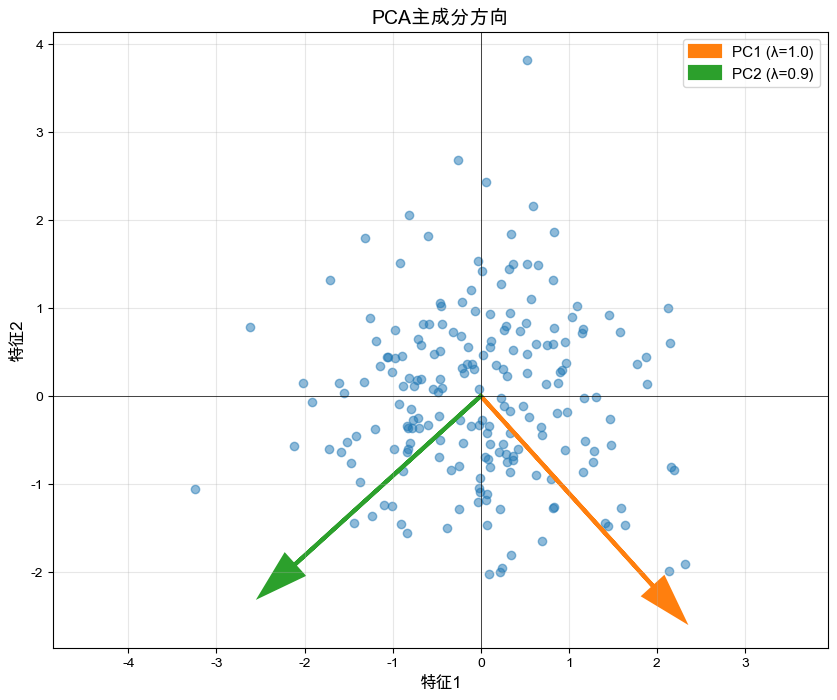

In [19]:
# 简单PCA示例
from sklearn.datasets import make_blobs

# 生成2D数据
X, _ = make_blobs(n_samples=200, n_features=2, centers=1, random_state=42)

# 中心化数据
X_centered = X - X.mean(axis=0)

# 计算协方差矩阵
cov_matrix = np.cov(X_centered.T)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 排序（按特征值从大到小）
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print(f'特征值: {eigenvalues}')
print(f'第一主成分解释的方差比例: {eigenvalues[0] / eigenvalues.sum():.2%}')

# 可视化
plt.figure(figsize=(10, 8))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5)

# 绘制主成分
for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors.T)):
    plt.arrow(0, 0, 
             eigenvector[0] * np.sqrt(eigenvalue) * 3, 
             eigenvector[1] * np.sqrt(eigenvalue) * 3,
             head_width=0.3, head_length=0.5, 
             fc=f'C{i+1}', ec=f'C{i+1}', linewidth=3,
             label=f'PC{i+1} (λ={eigenvalue:.1f})')

plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlabel('特征1', fontsize=12)
plt.ylabel('特征2', fontsize=12)
plt.title('PCA主成分方向', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## 4. 实战练习

### 练习1：计算向量夹角

In [20]:
# TODO: 编写函数计算两个向量的夹角（度数）
def angle_between_vectors(v1, v2):
    """
    计算两个向量之间的夹角
    返回：角度（度数）
    """
    # 你的代码...
    pass

# 测试
v1 = np.array([1, 0])
v2 = np.array([1, 1])
# 应该返回 45度

### 练习2：实现矩阵乘法

In [21]:
# TODO: 不使用NumPy，手动实现矩阵乘法
def matrix_multiply(A, B):
    """
    实现矩阵乘法 C = A @ B
    """
    # 你的代码...
    pass

# 测试
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]
# 验证结果与 np.array(A) @ np.array(B) 相同

### 练习3：实现简单的PCA

In [22]:
# TODO: 实现PCA降维
def my_pca(X, n_components=2):
    """
    PCA降维
    X: 数据矩阵 (n_samples, n_features)
    n_components: 降维后的维度
    返回: 降维后的数据 (n_samples, n_components)
    """
    # 提示：
    # 1. 中心化数据
    # 2. 计算协方差矩阵
    # 3. 计算特征值和特征向量
    # 4. 选择前n_components个主成分
    # 5. 投影数据
    
    # 你的代码...
    pass

## 5. 总结

### 核心知识点
- ✅ 向量和矩阵的基本概念
- ✅ 向量运算（加法、点积、模长）
- ✅ 矩阵运算（加法、乘法、转置、逆）
- ✅ 特征值和特征向量
- ✅ 线性代数在ML中的应用

### 机器学习应用总结

| 线性代数概念 | 机器学习应用 |
|------------|-------------|
| 向量 | 数据样本、特征表示 |
| 矩阵 | 数据集、权重矩阵 |
| 点积 | 相似度计算、神经网络 |
| 矩阵乘法 | 前向传播、线性变换 |
| 转置 | 梯度计算、反向传播 |
| 逆矩阵 | 正规方程求解 |
| 特征值/向量 | PCA降维、谱聚类 |

### 关键要点
1. **数据即向量**：每个样本是一个向量
2. **批量计算**：矩阵运算实现并行计算
3. **几何直觉**：理解运算的几何意义
4. **NumPy是基础**：熟练使用NumPy操作

---

### 下一步
学习**微积分基础**，理解梯度下降的数学原理！